In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression

In [81]:
# # Load the dataset
data = pd.read_csv("day.csv")

# Convert 'dteday' to datetime if not already
data['dteday'] = pd.to_datetime(data['dteday'], errors='coerce')

# Convert 'dteday' to numeric (e.g., days since the minimum date in the dataset)
data['dteday_numeric'] = (data['dteday'] - data['dteday'].min()).dt.days

# Drop the original datetime column if needed
data = data.drop(columns=['dteday'])

In [ ]:
# Analysis of Features
print(data.info())  # Inspect columns and types
print("\n\n")
print(data.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         731 non-null    int64  
 1   season          731 non-null    int64  
 2   yr              731 non-null    int64  
 3   mnth            731 non-null    int64  
 4   holiday         731 non-null    int64  
 5   weekday         731 non-null    int64  
 6   workingday      731 non-null    int64  
 7   weathersit      731 non-null    int64  
 8   temp            731 non-null    float64
 9   atemp           731 non-null    float64
 10  hum             731 non-null    float64
 11  windspeed       731 non-null    float64
 12  casual          731 non-null    int64  
 13  registered      731 non-null    int64  
 14  cnt             731 non-null    int64  
 15  dteday_numeric  731 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 91.5 KB
None



          instant      se

                 instant    season        yr      mnth   holiday   weekday  \
instant         1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season          0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr              0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth            0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday         0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday        -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday     -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit     -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp            0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp           0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum             0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed      -0.112620 -0.229046 -0.011817 -0.207502  0.006292

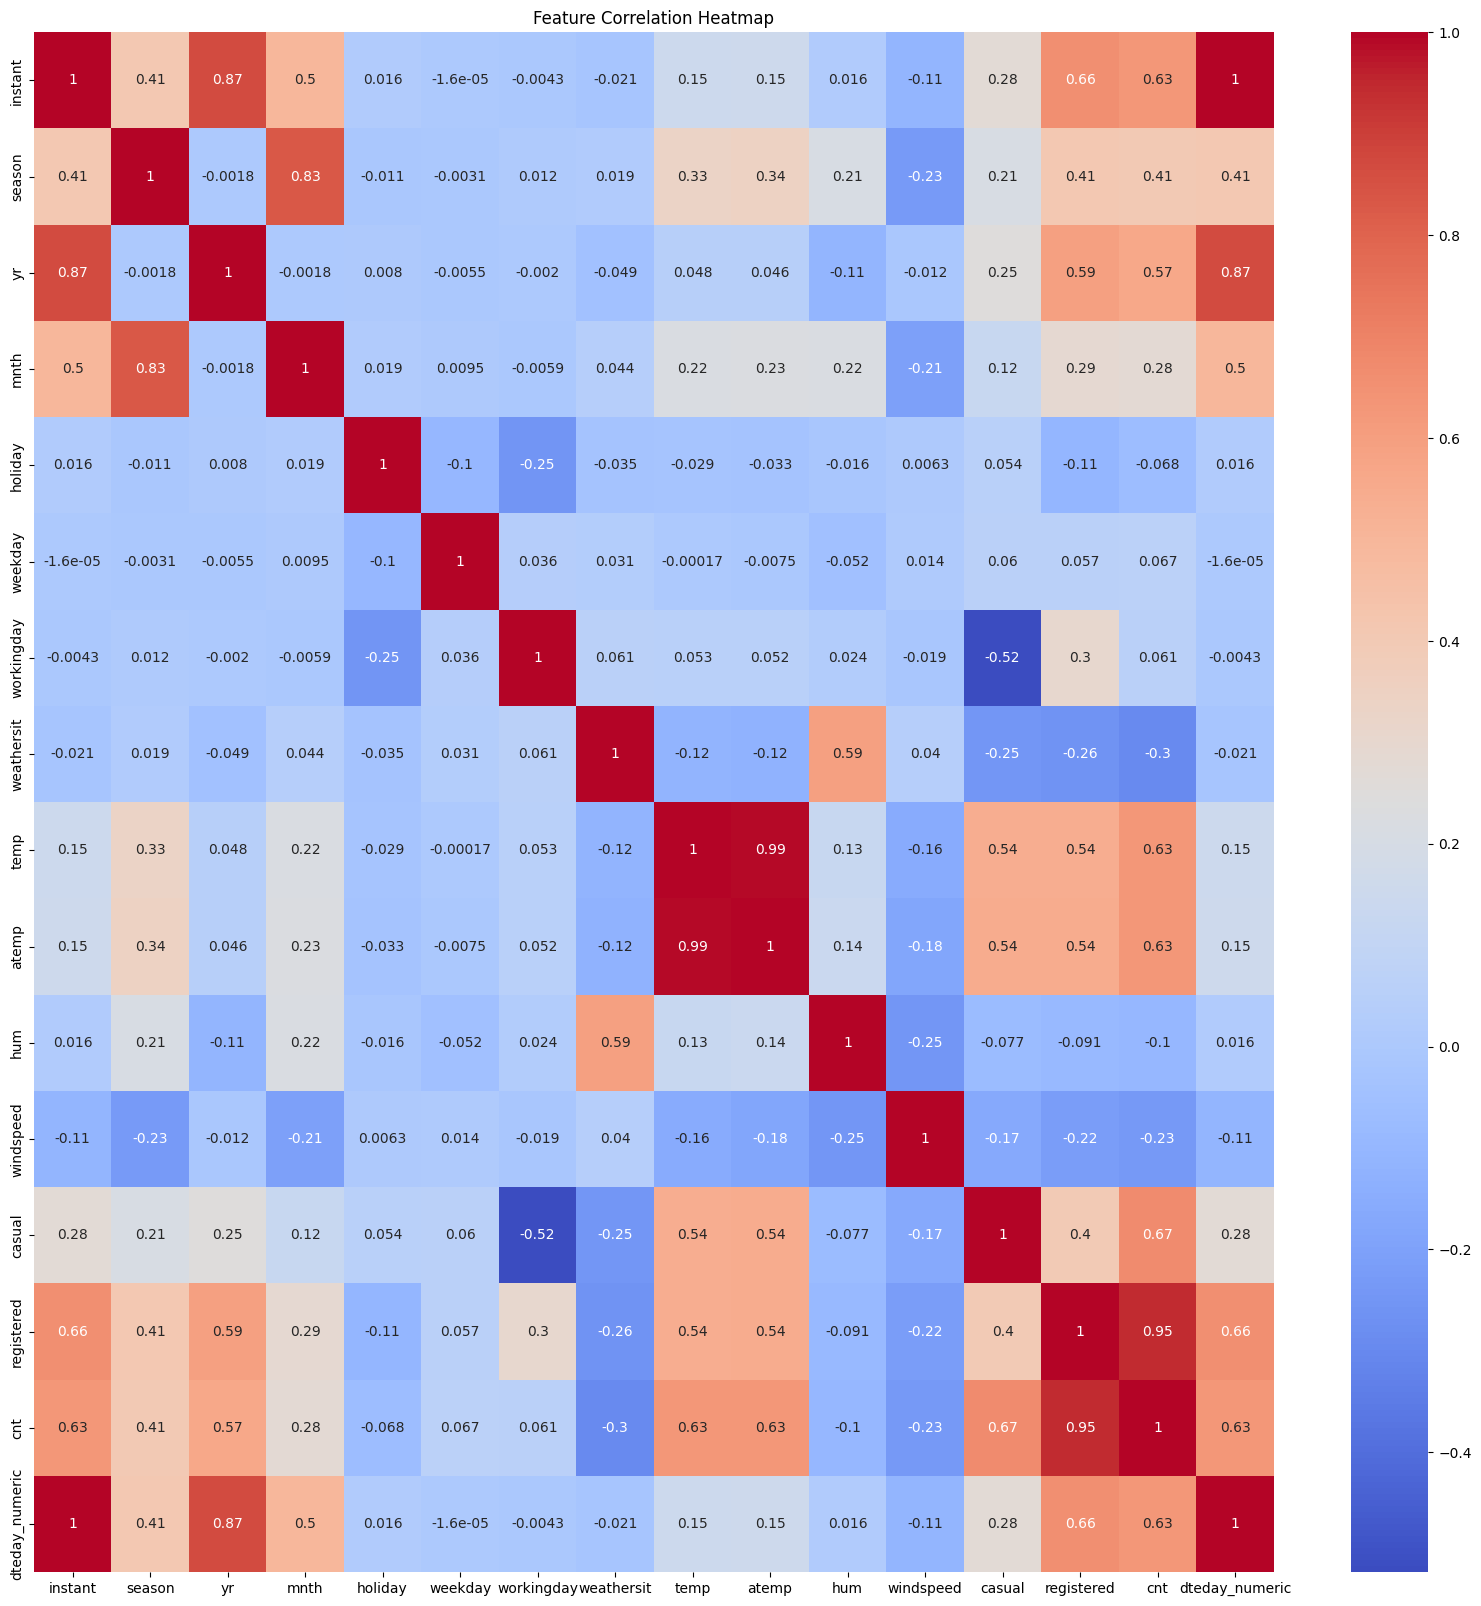

In [ ]:
# Correlation
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

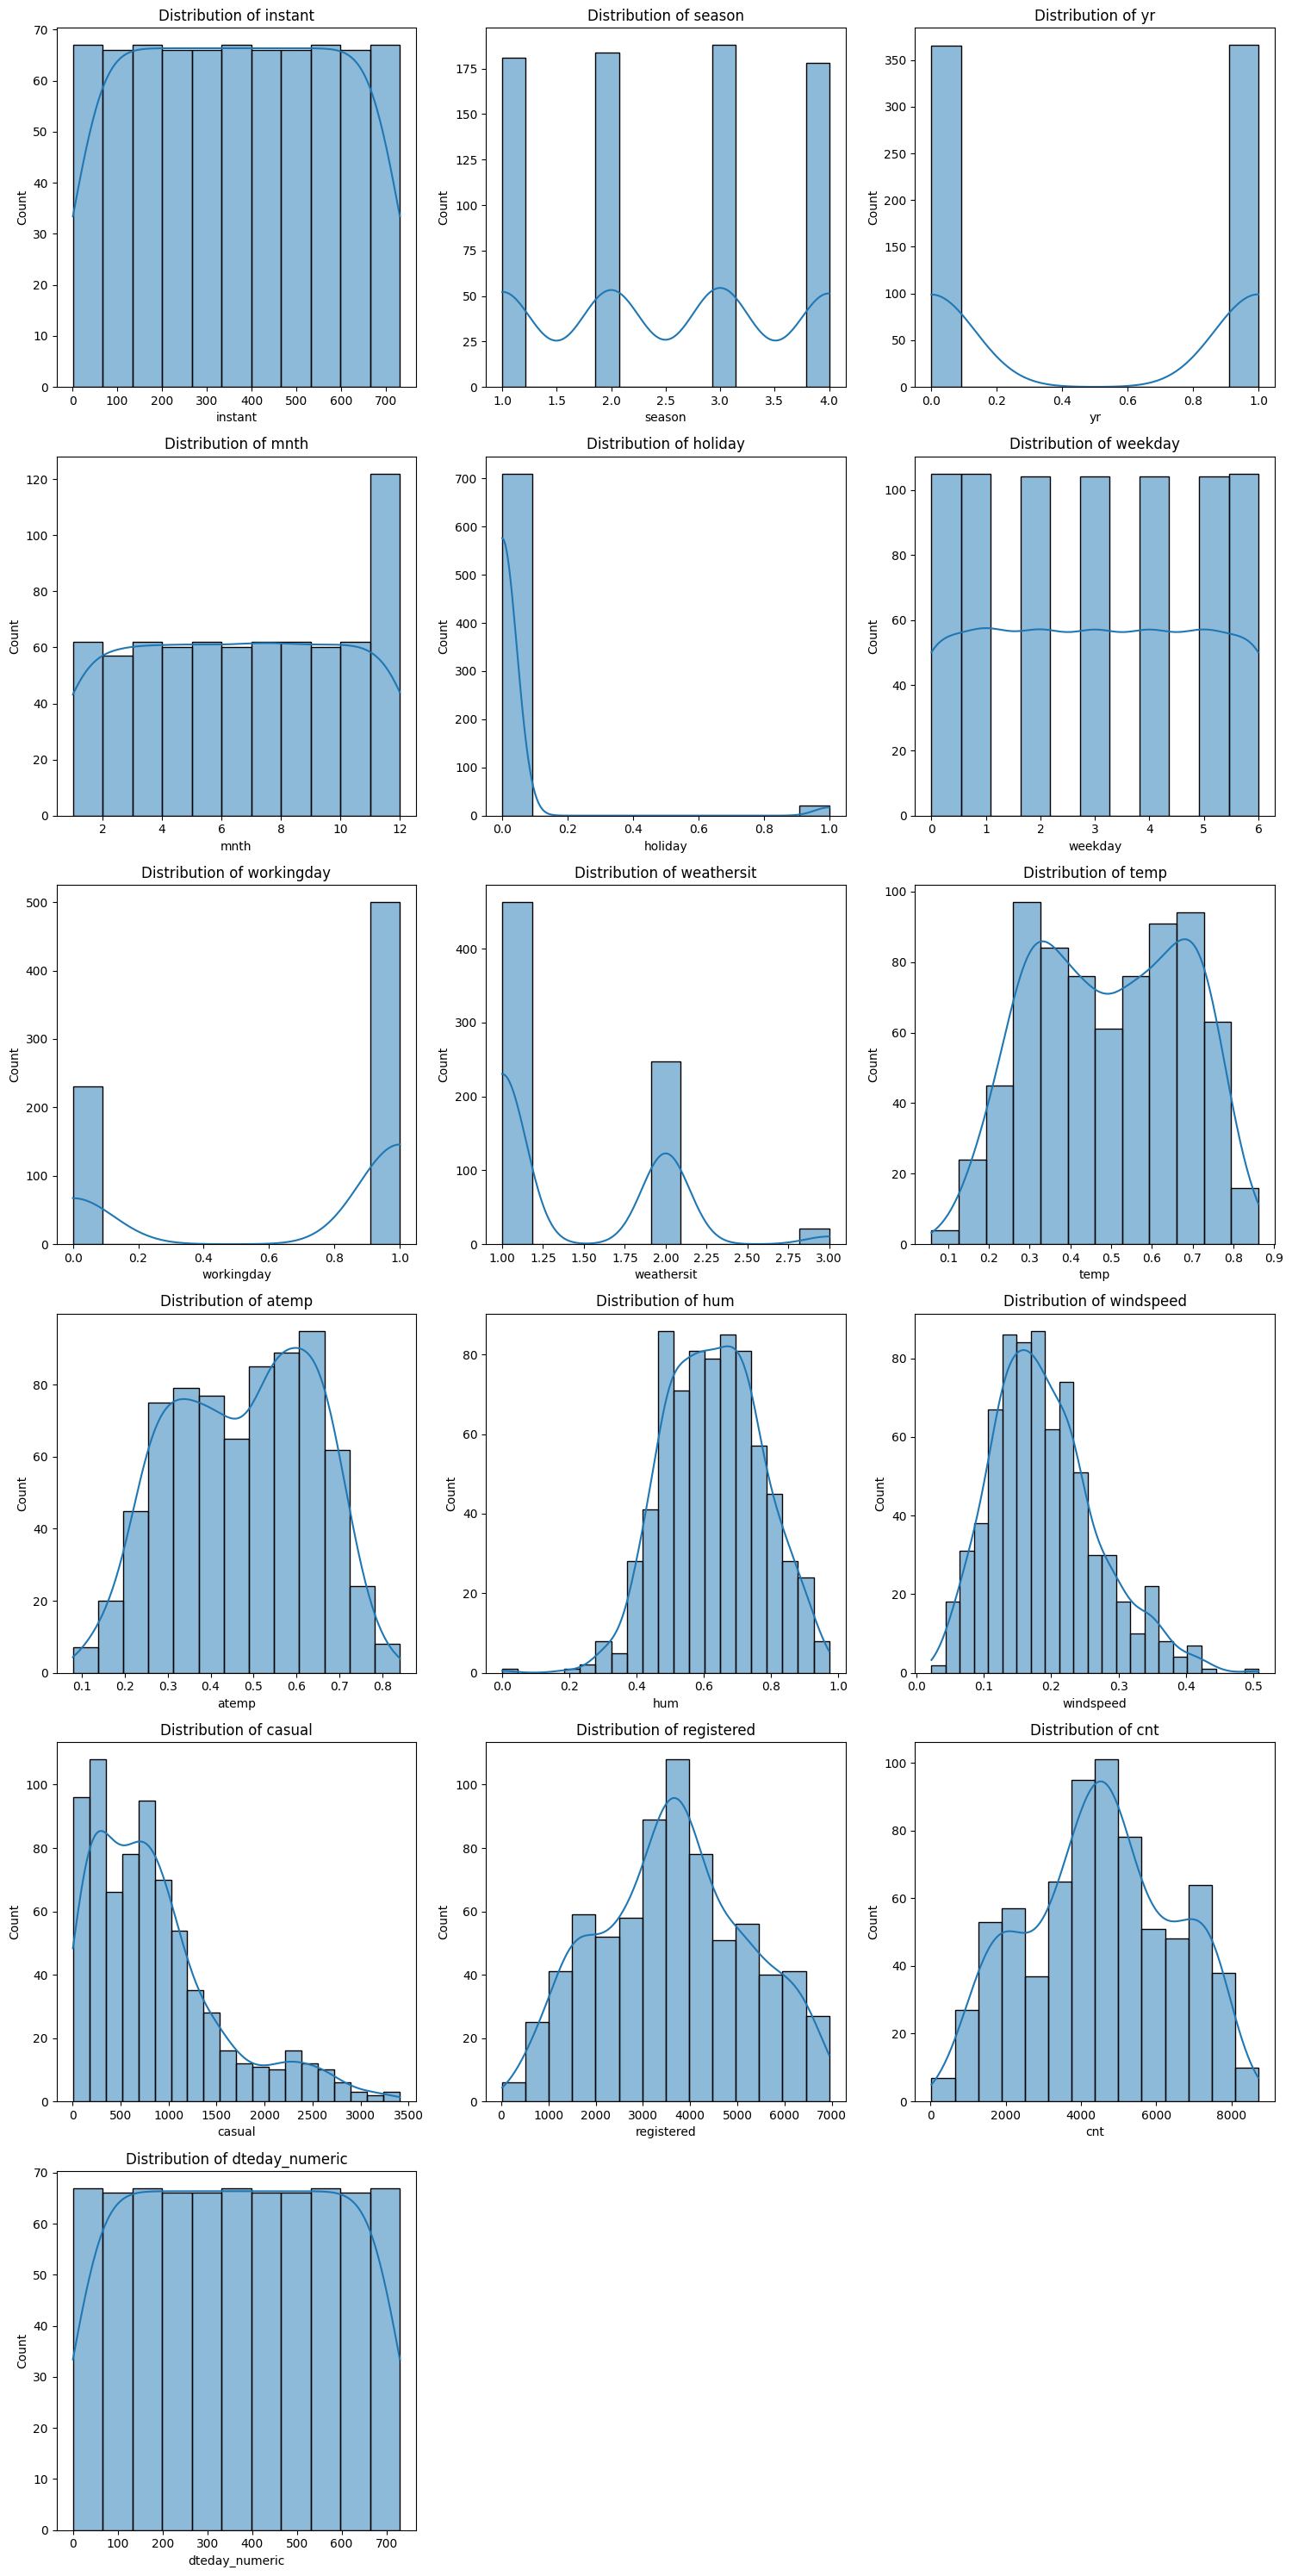

In [ ]:
# Data Distribution
# Create a grid of subplots
num_columns = data.select_dtypes(include=np.number).columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(len(num_columns) / n_cols))  # Calculate the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each numeric column
for i, col in enumerate(num_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove extra subplots if the number of columns isn't a perfect fit
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


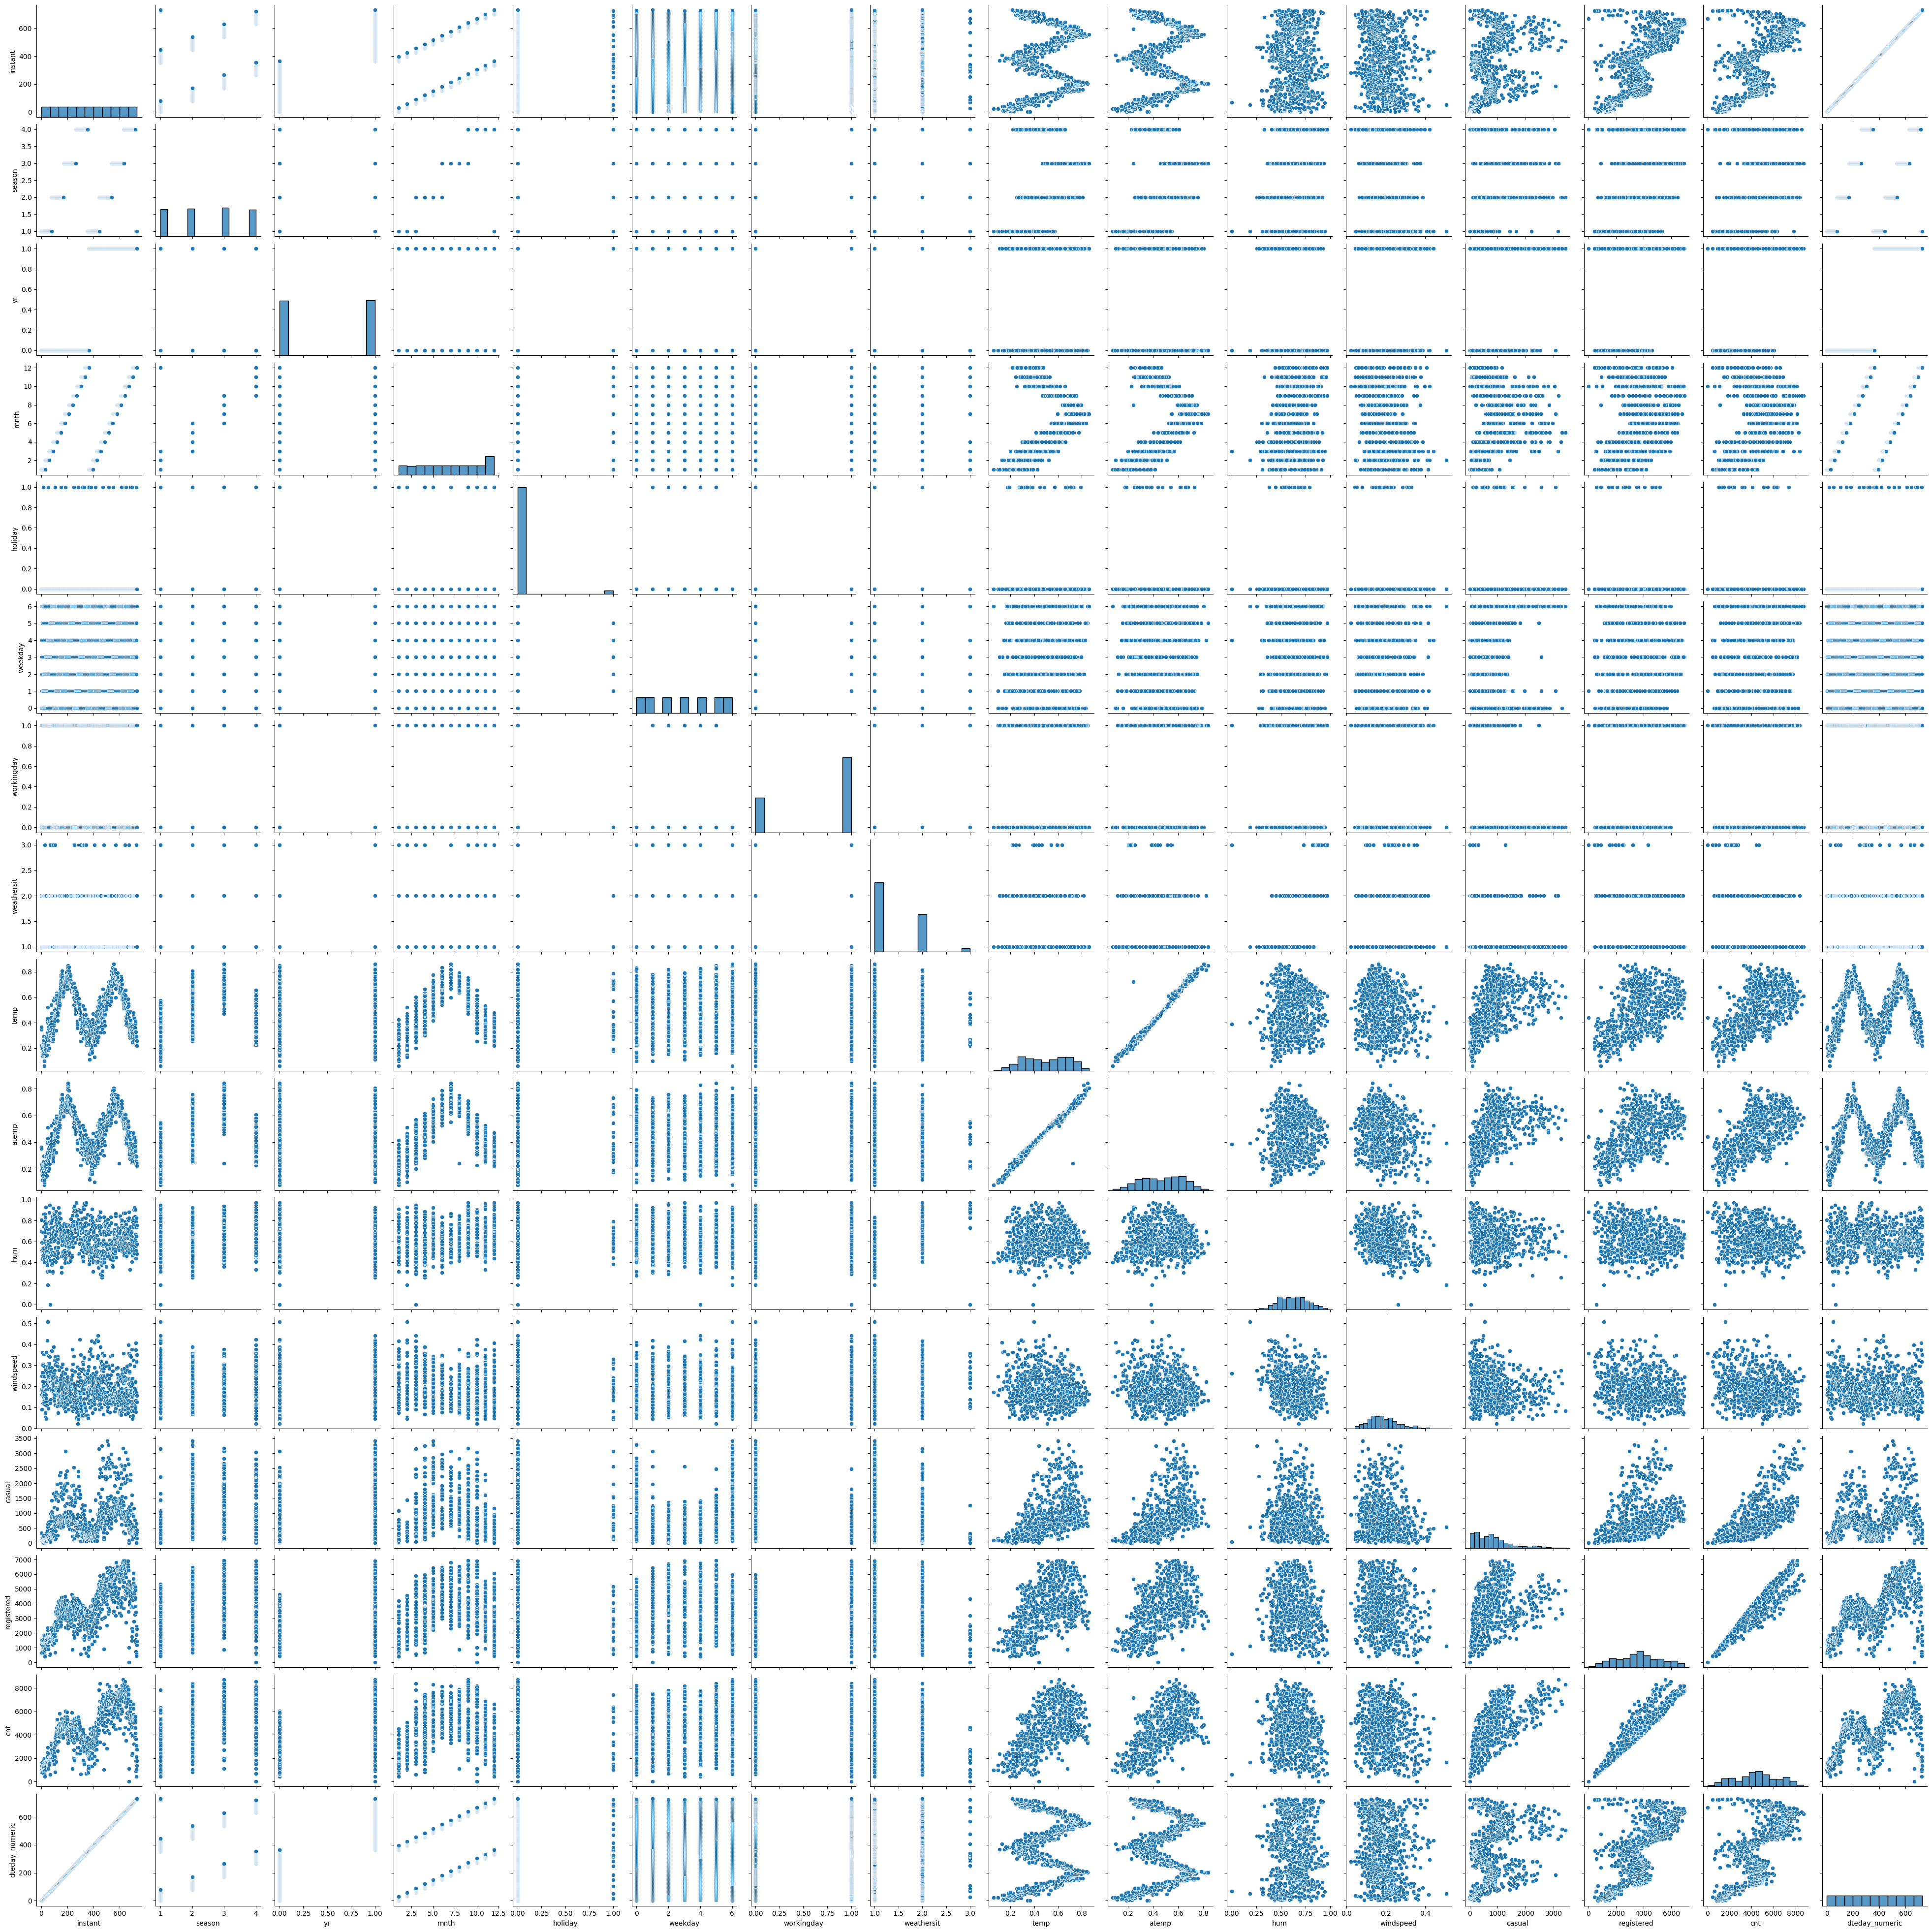

In [88]:
# Data Visualization
sns.pairplot(data)
plt.show()

COUNT

In [ ]:
# 3. Independence 
X = data.drop(columns=["cnt"])  # Features
y = data["cnt"]  # Target variable
mutual_info = mutual_info_regression(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(feature_importance)


Mutual Information Scores:
registered        1.665601
instant           0.905276
dteday_numeric    0.903527
casual            0.669468
atemp             0.464677
temp              0.389529
mnth              0.375189
yr                0.278808
season            0.215862
weathersit        0.065937
windspeed         0.055770
hum               0.045847
weekday           0.044802
workingday        0.023912
holiday           0.011006
dtype: float64


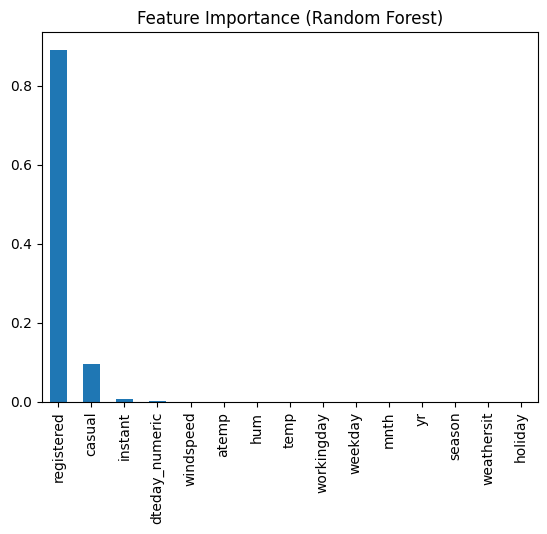

In [85]:
# 4. Feature Importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.show()

SEASON

In [ ]:
# Independence
X = data.drop(columns=["season"])  # Features
y = data["season"]  # Target variable
mutual_info = mutual_info_regression(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(feature_importance)

Mutual Information Scores:
dteday_numeric    1.370999
instant           1.368901
mnth              1.137552
atemp             0.592254
temp              0.554185
casual            0.254421
cnt               0.214535
registered        0.204947
windspeed         0.071869
hum               0.055736
workingday        0.028294
weathersit        0.007263
holiday           0.000969
weekday           0.000000
yr                0.000000
dtype: float64


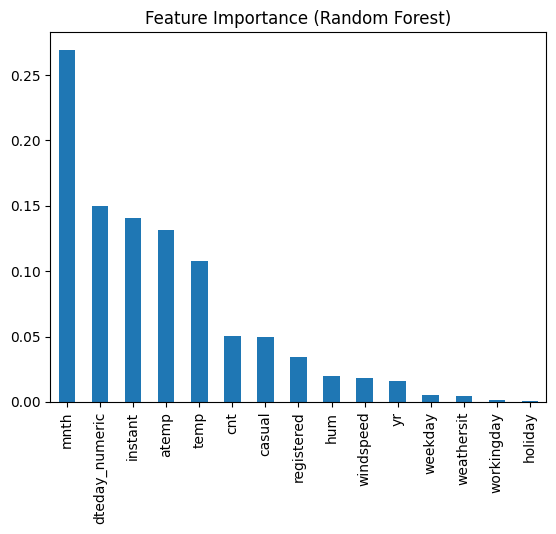

In [ ]:
# Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.show()